In [ ]:
# To create a synthetic classification dataset

from sklearn.datasets import make_classification
import numpy as np

# Generate a 2D classification dataset with 100 samples, 2 features, 1 informative feature, 
# 2 classes, and separated clusters with a large class separation for better visualization.
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

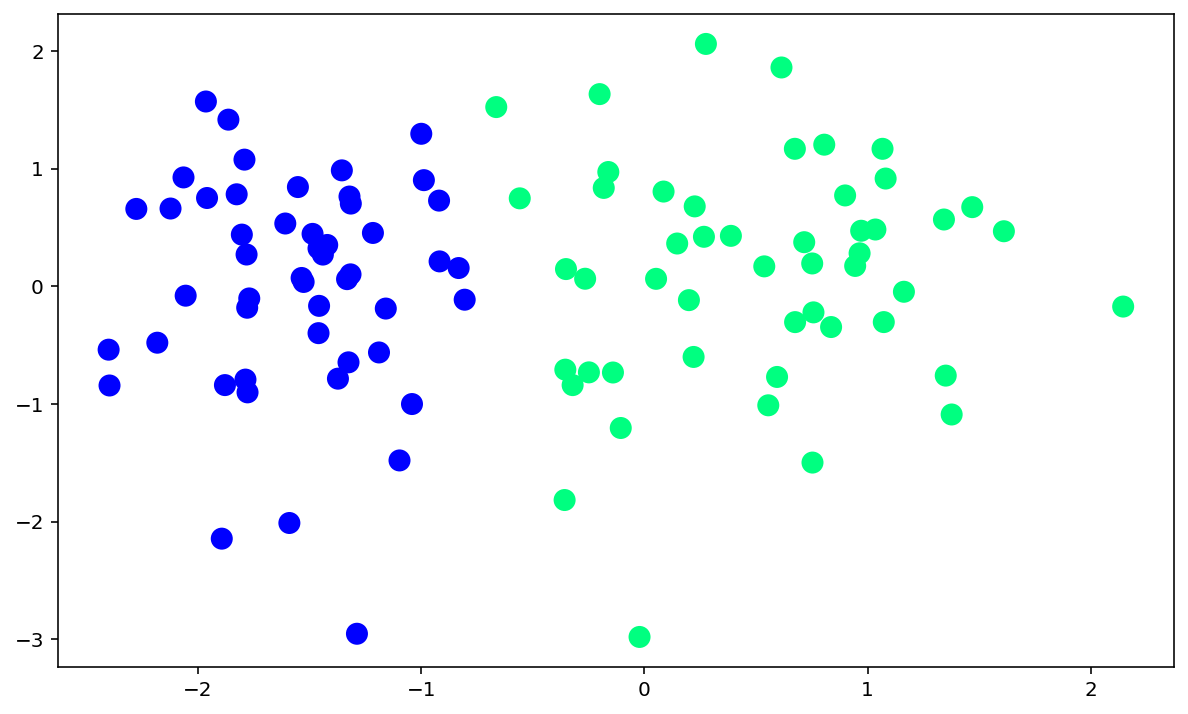

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [11]:
# Define the perceptron function, a basic linear classifier
def perceptron(X,y):

    # Insert a bias term (intercept) into the feature matrix by adding a column of 1s
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])  # Initialize weights to 1 for each feature (including bias)
    lr = 0.1  # Set learning rate for updating weights

    # Iterate 1000 times to update the weights
    for i in range(1000):
        j = np.random.randint(0,100) # Select a random data point
        y_hat = step(np.dot(X[j],weights))  # Compute the output of the perceptron 

         # Update weights using the perceptron learning rule: w = w + lr * (y_true - y_pred) * x
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [12]:
# It returns 1 if the input z > 0 (positive class), otherwise 0 (negative class)
def step(z):
    return 1 if z>0 else 0

In [13]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.31718533 0.11583733]
1.0


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

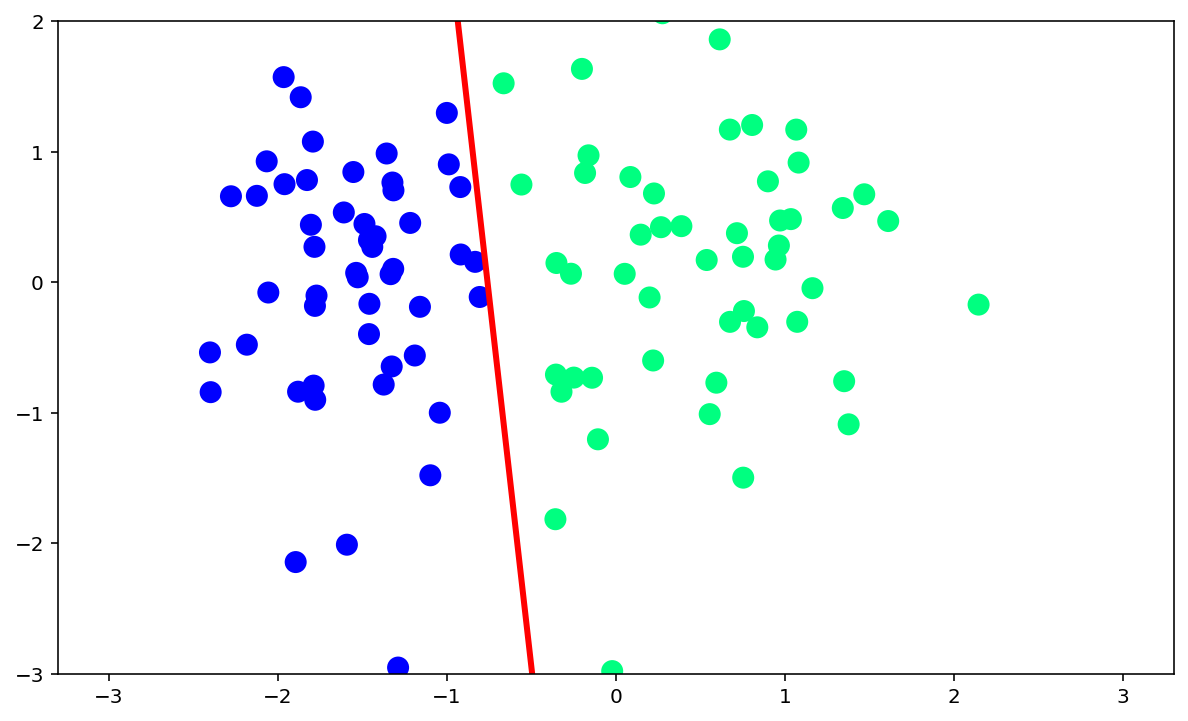

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)